## DESeq2

We start by loading the DESeq2 library. This is pretty similar to `import` in Python. It normally produces a bunch of informative but not worrying information.

In [2]:
library(DESeq2)

Now we will read in the CSV count table.

Conceptually this is similar to `pd.read_csv()`. We have a couple of special parameters in addition to the filename.

In [3]:
counts <- read.csv("1M.counts.csv", stringsAsFactors=FALSE, row.names=1)

We can use the `head()` function, similar to the `.head()` method in pandas, to check out our count table. Notice that the "row names" are now gene names.

In [4]:
head(counts)

,rapa_0,rapa_60
,<int>,<int>
Q0010,0,0
Q0017,0,0
Q0032,0,0
Q0045,0,0
Q0050,0,0
Q0055,0,0


We will also read in the condition matrix.

In [5]:
conditions <- read.csv("1M.conditions.csv", stringsAsFactors=FALSE, row.names=1)
conditions

,rapa
,<chr>
rapa_0,no
rapa_60,yes


Now, we run a few DESeq2-specific commands.

The first creates a `DESeqDataSet` object which we'll call `dds`.

In [6]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = conditions,
                              design = ~ rapa)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


Next, we estimate the "size factors" that control for the differences in library size.

In this analysis, we used exactly 1 million reads for each library and so the size factors are almost exactly 1.

In [7]:
dds <- estimateSizeFactors(dds)
sizeFactors(dds)

rapa_0   rapa_60 
0.9900883 1.0100109

Now we estimate the noise in our measurements, called the "dispersions".

When you run this yourself with replicates, you should *remove* the entire `, modelMatrix=...` part.

Just write `dds <- estimateDispersions(dds)`.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



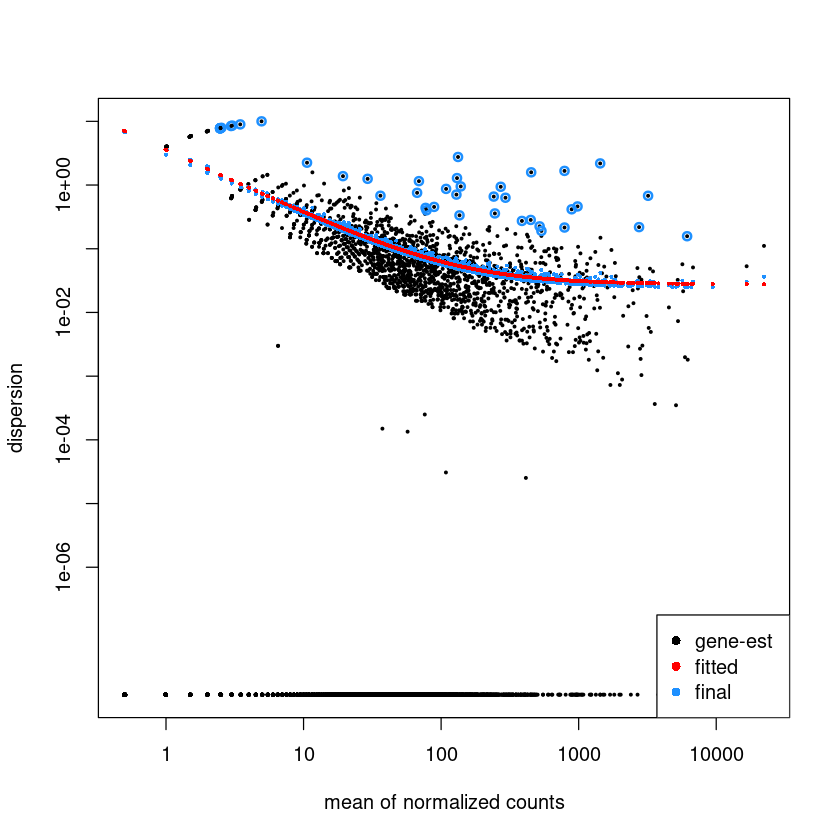

In [8]:
dds <- estimateDispersions(dds, modelMatrix=model.matrix(~1, conditions))
plotDispEsts(dds)

Finally, we use the Wald test to detect statistically significantly different genes.

In [9]:
dds <- nbinomWaldTest(dds)

All of our analysis is still hidden inside the `DESeqDataSet`. We can pull out the results using the `results()` function.

In [10]:
res <- results(dds)

Warning message in qf(0.99, p, m - p):
“NaNs produced”


In [11]:
res

log2 fold change (MLE): rapa yes vs no 
Wald test p-value: rapa yes vs no 
DataFrame with 6607 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat    pvalue      padj
          <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
Q0010             0             NA        NA         NA        NA        NA
Q0017             0             NA        NA         NA        NA        NA
Q0032             0             NA        NA         NA        NA        NA
Q0045             0             NA        NA         NA        NA        NA
Q0050             0             NA        NA         NA        NA        NA
...             ...            ...       ...        ...       ...       ...
YPR201W     3.00015     -0.0287371   2.40301 -0.0119588  0.990458  0.999649
YPR202W     1.49509      0.9712469   3.42210  0.2838163  0.776551  0.999649
YPR203W     0.00000             NA        NA         NA        NA        NA
YPR204C-A   0.00000             NA        NA      

We can write these results to a CSV file and escape from R back into Python.

In [12]:
write.csv(res, "1M.results.csv")